12/6 制約式=5は同値だから一つの式でいいのかも、じゃないとランクが下がる  
12/6 cvxpy使ったらkkt条件できた、ラグランジュ(m=3)は下の方にあるけど、非線形連立方程式が解けないからできてない

In [203]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#sysはコマンドライン引数
import sys
import csv
np.seterr(divide='ignore', invalid='ignore')
#csvファイルの読み込み、一行目はヘッダーじゃない
df = pd.read_csv("output.csv",header=None)
#クラスタ数宣言
c=2
#Kはクラスタサイズ 
K=5
#dfをnumpyで扱えるnp.ndarray変換
X = df.values
#配列の行数、列数の格納

X_size,dimension = X.shape


centroids = X[np.random.choice(X_size,c)]
distances=np.zeros((X_size,c))

In [214]:
import cvxpy as cp  # pip install cvxpy
# 変数
x_1 = cp.Variable()
x_2 = cp.Variable()

u0 = cp.Variable()
u1 = cp.Variable()
u2 = cp.Variable()
u3 = cp.Variable()
u4 = cp.Variable()
u5 = cp.Variable()
u6 = cp.Variable()
u7 = cp.Variable()
u8 = cp.Variable()
u9 = cp.Variable()
u10 = cp.Variable()
u11 = cp.Variable()
u12 = cp.Variable()
u13 = cp.Variable()
u14 = cp.Variable()
u15 = cp.Variable()
u16 = cp.Variable()
u17 = cp.Variable()
u18 = cp.Variable()
u19 = cp.Variable()

In [215]:
#dにはd11,d12,d13,d14,d21,d22,,,dn1,,dncの順でリスト作る
d=[]
for i in range(X_size):
    for j in range(c):
        d.append(np.sum((X[i]-centroids[j])**2))
#d = [0.0000000001 if i == 0 else i for i in d]
#dを小数第3位で四捨五入
#d = [round(d[n],2) for n in range(len(d))] 
d

[0.03822570388899998,
 0.034195399444999997,
 0.032134479444999975,
 0.030694438889000017,
 0.00010137944500000041,
 0.053361218889000014,
 0.030344904444999977,
 0.02751202444500001,
 0.08168416388899997,
 0.002075713888999991,
 0.0,
 0.05780138777800003,
 0.14067954388900006,
 0.024758896689000005,
 0.04101150444499998,
 0.004345224445000007,
 0.05780138777800003,
 0.0,
 0.08857832444499997,
 0.143128944445]

In [216]:
# 最小化したい関数 (目的関数)
# 最小化したい関数 (目的関数)

objective = cp.Minimize(
    d[0]*cp.power(u0,3)+d[1]*cp.power(u1,3)+d[2]*cp.power(u2,3)+d[3]*cp.power(u3,3)+d[4]*cp.power(u4,3)+d[5]*cp.power(u5,3)+\
    d[6]*cp.power(u6,3)+d[7]*cp.power(u7,3)+d[8]*cp.power(u8,3)+d[9]*cp.power(u9,3)+d[10]*cp.power(u10,3)+\
    d[11]*cp.power(u11,3)+d[12]*cp.power(u12,3)+d[13]*cp.power(u13,3)+d[14]*cp.power(u14,3)+d[15]*cp.power(u15,3)+\
    d[16]*cp.power(u16,3)+d[17]*cp.power(u17,3)+d[18]*cp.power(u18,3)+d[19]*cp.power(u19,3)
)



# 制約条件
constraints = [
    u0>=0,u1>=0,u2>=0,u3>=0,u4>=0,u5>=0,u6>=0,u7>=0,u8>=0,u9>=0,u10>=0,
    u11>=0,u12>=0,u13>=0,u14>=0,u15>=0,u16>=0,u17>=0,u18>=0,u19>=0,
    u0+u1==1,u2+u3==1,u4+u5==1,u6+u7==1,u8+u9==1,u10+u11==1,u12+u13==1,u14+u15==1,
    u16+u17==1,u18+u19==1,u0+u2+u4+u6+u8+u10+u12+u14+u16+u18-5==0,u1+u3+u5+u7+u9+u11+u13+u15+u17+u19-5==0
]


# 問題を定義
problem = cp.Problem(objective, constraints)

# 最適化 (戻り値は最適化後に得られた値=最小値)
result = problem.solve()
print("result")
print(result)  # 0.6666666666666667

# 最小値の時のx_1とx_2の値
print("u0.value, u1.value")
print(u0.value, u1.value,u2.value, u3.value,u4.value, u5.value,u6.value, u7.value,u8.value, u9.value,
     u10.value, u11.value,u12.value, u13.value,u14.value, u15.value,u16.value, u17.value,u18.value, u19.value,) 

# 最小値の時のラグランジュ定数
print("ラグランジュ定数") 
print(constraints[0].dual_value, constraints[1].dual_value,constraints[3].dual_value, constraints[4].dual_value,
      constraints[5].dual_value, constraints[6].dual_value,constraints[7].dual_value, constraints[8].dual_value,
      constraints[9].dual_value, constraints[10].dual_value,constraints[11].dual_value, constraints[12].dual_value,
      constraints[13].dual_value, constraints[14].dual_value,constraints[15].dual_value, constraints[16].dual_value,
      constraints[17].dual_value, constraints[18].dual_value,constraints[19].dual_value, constraints[20].dual_value,
      constraints[21].dual_value, constraints[22].dual_value,constraints[23].dual_value, constraints[24].dual_value,
      constraints[25].dual_value, constraints[26].dual_value,constraints[27].dual_value, constraints[28].dual_value,
      constraints[29].dual_value, constraints[30].dual_value,constraints[31].dual_value,
     )  # 1.3333333333333337 0.0

result
0.06868286996287623
u0.value, u1.value
0.5022278421250865 0.4977721578749236 0.5128712283631678 0.48712877163684454 0.9999999987408523 1.2591487307414353e-09 0.5079598071095536 0.492040192890459 0.177490747789052 0.8225092522109495 0.9999999986715247 1.3284754333229579e-09 0.30534458436453676 0.6946554156354477 0.28699596905442404 0.7130040309455777 0.14221601171078266 0.8577839882892061 0.5648938120710203 0.43510618792897954
ラグランジュ定数
5.821514894350475e-12 6.0045296206219174e-12 6.149218682206871e-12 3.0347265166617294e-12 0.0025411177840021924 5.739649512020633e-12 6.094023511759583e-12 2.017546089049794e-11 3.5481777157038945e-12 3.0504187237542405e-12 0.00279370113972279 1.0031069797397545e-11 4.1969585907357116e-12 1.032652914558232e-11 4.249094111578797e-12 2.7426242767276953e-11 3.4644859096911252e-12 5.178988161519328e-12 6.871509870733347e-12 -0.010001253599437718 -0.00643360393459005 0.01862008116494914 -0.004565016556223591 0.011204419348603337 0.01892423041866915 -0.0

In [224]:
#uの値を抽出(ndarray型)
u_value = np.empty(0)#空のndarrayを作成
u_value = np.append(u_value,u0.value)
u_value = np.append(u_value,u1.value)
u_value = np.append(u_value,u2.value)
u_value = np.append(u_value,u3.value)
u_value = np.append(u_value,u4.value)
u_value = np.append(u_value,u5.value)
u_value = np.append(u_value,u6.value)
u_value = np.append(u_value,u7.value)
u_value = np.append(u_value,u8.value)
u_value = np.append(u_value,u9.value)
u_value = np.append(u_value,u10.value)
u_value = np.append(u_value,u11.value)
u_value = np.append(u_value,u12.value)
u_value = np.append(u_value,u13.value)
u_value = np.append(u_value,u14.value)
u_value = np.append(u_value,u15.value)
u_value = np.append(u_value,u16.value)
u_value = np.append(u_value,u17.value)
u_value = np.append(u_value,u18.value)
u_value = np.append(u_value,u19.value)
u_list = u_value.reshape([10,2])
print(u_list)
print(np.sum(u_list, axis=1))#行ごとの合計値1になるはず
print(np.sum(u_list, axis=0))#列ごとの合計値Kになるはず
u= u_value

[[5.02227842e-01 4.97772158e-01]
 [5.12871228e-01 4.87128772e-01]
 [9.99999999e-01 1.25914873e-09]
 [5.07959807e-01 4.92040193e-01]
 [1.77490748e-01 8.22509252e-01]
 [9.99999999e-01 1.32847543e-09]
 [3.05344584e-01 6.94655416e-01]
 [2.86995969e-01 7.13004031e-01]
 [1.42216012e-01 8.57783988e-01]
 [5.64893812e-01 4.35106188e-01]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[5. 5.]


In [225]:
u_list[0][1]

0.4977721578749236

In [226]:
for i in range(0,20,2):
    print(u_value[i]+u_value[i+1])
print(u_value[0]+u_value[2]+u_value[4]+u_value[6]+u_value[8]+u_value[10]+u_value[12]+u_value[14]+u_value[16]+u_value[18])
print(u_value[1]+u_value[3]+u_value[5]+u_value[7]+u_value[9]+u_value[11]+u_value[13]+u_value[15]+u_value[17]+u_value[19])

1.0000000000000102
1.0000000000000124
1.000000000000001
1.0000000000000127
1.0000000000000016
1.0
0.9999999999999845
1.0000000000000018
0.9999999999999888
0.9999999999999998
5.000000000000002
5.000000000000012


In [227]:
u= u_value

In [228]:
#分母計算(クラスタサイズになるはず)
v0_denominator=0
v1_denominator=0
for i in range(0,20,2):
    v0_denominator += u[i]
for i in range(1,20,2):
    v1_denominator += u[i]
#print(v0_denominator,v1_denominator)
#分子計算
v0_numerator = 0
v1_numerator = 0
for i in range(10):
    v0_numerator += u[i*2]*X[i]
    v1_numerator += u[1+i*2]*X[i]
#print(v0_numerator,v1_numerator)
v=[0 for i in range(2)]
v[0] = v0_numerator / v0_denominator
v[1] = v1_numerator / v1_denominator
print("クラスター中心はcluster1:{},cluster2:{}".format(v[0],v[1]))

クラスター中心はcluster1:[0.53118838 0.57834075],cluster2:[0.62047162 0.50782605]


In [229]:
centroids

array([[0.5175  , 0.693333],
       [0.686667, 0.5225  ]])

In [222]:
cluster = [0 for i in range(10)]
for i in range (10):
    if u[i*2]>u[1+i*2]:
        cluster[i] = 0
    else:
        cluster[i] = 1
np_cluster =np.array(cluster)
print(np_cluster)

[0 0 0 0 1 0 1 1 1 0]


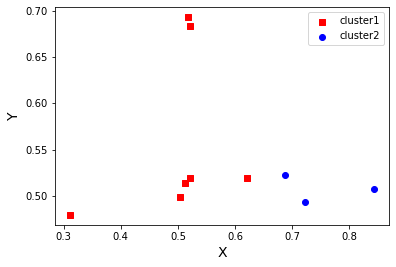

In [202]:
#グラフ
colors = ['red', 'blue', 'green','yellow','fuchsia']
markers = [",", "o", "v", "^", "<", ">", "1", "2", "3"]
fig = plt.figure()
ax = fig.add_subplot(111)
#clusterはnp.array型じゃないとダメそう(リスト型だとグラフに描画されなかった)
for i in range(c):
    ax.scatter(X[:, 0][np_cluster==i], X[:, 1][np_cluster==i], color=colors[i],marker=markers[i])

#ax.set_title('fecbo', size=16)
ax.set_xlabel("X", size=14)
ax.set_ylabel("Y", size=14)
ax.legend(['cluster1', 'cluster2'])  # 凡例を表示

plt.show()

fig.savefig("img2d.pdf")

In [627]:
from sympy import diff,symbols,solve
#距離dの定数定義
#d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18,d19\
#= symbols("d0 d1 d2 d3 d4 d5 d6 d7 d8 d9 d10 \
#d11 d12 d13 d14 d15 d16 d17 d18 d19")
#帰属度uの変数定義
u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13,u14,u15,u16,u17,u18,u19\
= symbols("u0 u1 u2 u3 u4 u5 u6 u7 u8 u9 u10 \
u11 u12 u13 u14 u15 u16 u17 u18 u19")
#条件式の変数定義
#g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11\
#= symbols("g0 g1 g2 g3 g4 g5 g6 g7 g8 g9 g10 g11")
#ラムダ変数の定義
l0,l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11\
= symbols("l0 l1 l2 l3 l4 l5 l6 l7 l8 l9 l10 l11")

In [628]:
f = u0**3*d[0] + u1**3*d[1] + u2**3*d[2] + u3**3*d[3] + u4**3*d[4] + u5**3*d[5] +\
u6**3*d[6] + u7**3*d[7] + u8**3*d[8] + u9**3*d[9] + u10**3*d[10] + u11**3*d[11] +\
u12**3*d[12] + u13**3*d[13] + u14**3*d[14] + u15**3*d[15] + u16**3*d[16] + u17**3*d[17] +\
u18**3*d[18]+ u19**3*d[19]

In [629]:
f

0.05*u0**3 + 0.01*u1**3 + 0.08*u10**3 + 0.04*u11**3 + 0.01*u12**3 + 0.12*u13**3 + 0.01*u14**3 + 0.01*u15**3 + 0.01*u16**3 + 0.03*u17**3 + 0.17*u18**3 + 0.04*u19**3 + 0.04*u2**3 + 0.01*u3**3 + 0.08*u4**3 + 0.03*u5**3 + 0.04*u6**3 + 0.01*u7**3 + 0.01*u8**3 + 0.05*u9**3

In [630]:
#帰属度が1になる制約式
g0 = u0 + u1 -1
g1 = u2 + u3 -1
g2 = u4 + u5 -1
g3 = u6 + u7 -1
g4 = u8 + u9 -1
g5 = u10 + u11 -1
g6 = u12 + u13 -1
g7 = u14 + u15 -1
g8 = u16 + u17 -1
g9 = u18 + u19 -1
#クラスタサイズがcになる制約式
g10 = u0+u2+u4+u6+u8+u10+u12+u14+u16+u18-5
#g11 = u1+u3+u5+u7+u9+u11+u13+u15+u17+u19-5

In [631]:
m0  = np.array([1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
m1  = np.array([0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
m2  = np.array([0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
m3  = np.array([0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0])
m4  = np.array([0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0])
m5  = np.array([0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0])
m6  = np.array([0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0])
m7  = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0])
m8  = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0])
m9  = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1])
m10 = np.array([1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0])
m11 = np.array([0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1])

In [634]:
M = np.stack([m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10])

In [635]:
np.linalg.matrix_rank(M)

11

In [636]:
# 定理式に代入
#theor = f-l0*g0-l1*g1-l2*g2-l3*g3-l4*g4-l5*g5-l6*g6-l7*g7-l8*g8-l9*g9-l10*g10-l11*g11
# ナブラfの作成
f_u0 = diff(f, u0)
f_u1 = diff(f, u1)
f_u2 = diff(f, u2)
f_u3 = diff(f, u3)
f_u4 = diff(f, u4)
f_u5 = diff(f, u5)
f_u6 = diff(f, u6)
f_u7 = diff(f, u7)
f_u8 = diff(f, u8)
f_u9 = diff(f, u9)
f_u10 = diff(f, u10)
f_u11 = diff(f, u11)
f_u12 = diff(f, u12)
f_u13 = diff(f, u13)
f_u14 = diff(f, u14)
f_u15 = diff(f, u15)
f_u16 = diff(f, u16)
f_u17 = diff(f, u17)
f_u18 = diff(f, u18)
f_u19 = diff(f, u19)
#ナブラg0
g0_u0 = diff(g0, u0)
g0_u1 = diff(g0, u1)
g0_u2 = diff(g0, u2)
g0_u3 = diff(g0, u3)
g0_u4 = diff(g0, u4)
g0_u5 = diff(g0, u5)
g0_u6 = diff(g0, u6)
g0_u7 = diff(g0, u7)
g0_u8 = diff(g0, u8)
g0_u9 = diff(g0, u9)
g0_u10 = diff(g0, u10)
g0_u11 = diff(g0, u11)
g0_u12 = diff(g0, u12)
g0_u13 = diff(g0, u13)
g0_u14 = diff(g0, u14)
g0_u15 = diff(g0, u15)
g0_u16 = diff(g0, u16)
g0_u17 = diff(g0, u17)
g0_u18 = diff(g0, u18)
g0_u19 = diff(g0, u19)

In [637]:
#ナブラg1
g1_u0 = diff(g1, u0)
g1_u1 = diff(g1, u1)
g1_u2 = diff(g1, u2)
g1_u3 = diff(g1, u3)
g1_u4 = diff(g1, u4)
g1_u5 = diff(g1, u5)
g1_u6 = diff(g1, u6)
g1_u7 = diff(g1, u7)
g1_u8 = diff(g1, u8)
g1_u9 = diff(g1, u9)
g1_u10 = diff(g1, u10)
g1_u11 = diff(g1, u11)
g1_u12 = diff(g1, u12)
g1_u13 = diff(g1, u13)
g1_u14 = diff(g1, u14)
g1_u15 = diff(g1, u15)
g1_u16 = diff(g1, u16)
g1_u17 = diff(g1, u17)
g1_u18 = diff(g1, u18)
g1_u19 = diff(g1, u19)
#ナブラg2
g2_u0 = diff(g2, u0)
g2_u1 = diff(g2, u1)
g2_u2 = diff(g2, u2)
g2_u3 = diff(g2, u3)
g2_u4 = diff(g2, u4)
g2_u5 = diff(g2, u5)
g2_u6 = diff(g2, u6)
g2_u7 = diff(g2, u7)
g2_u8 = diff(g2, u8)
g2_u9 = diff(g2, u9)
g2_u10 = diff(g2, u10)
g2_u11 = diff(g2, u11)
g2_u12 = diff(g2, u12)
g2_u13 = diff(g2, u13)
g2_u14 = diff(g2, u14)
g2_u15 = diff(g2, u15)
g2_u16 = diff(g2, u16)
g2_u17 = diff(g2, u17)
g2_u18 = diff(g2, u18)
g2_u19 = diff(g2, u19)

In [638]:
#ナブラg3
g3_u0 = diff(g3, u0)
g3_u1 = diff(g3, u1)
g3_u2 = diff(g3, u2)
g3_u3 = diff(g3, u3)
g3_u4 = diff(g3, u4)
g3_u5 = diff(g3, u5)
g3_u6 = diff(g3, u6)
g3_u7 = diff(g3, u7)
g3_u8 = diff(g3, u8)
g3_u9 = diff(g3, u9)
g3_u10 = diff(g3, u10)
g3_u11 = diff(g3, u11)
g3_u12 = diff(g3, u12)
g3_u13 = diff(g3, u13)
g3_u14 = diff(g3, u14)
g3_u15 = diff(g3, u15)
g3_u16 = diff(g3, u16)
g3_u17 = diff(g3, u17)
g3_u18 = diff(g3, u18)
g3_u19 = diff(g3, u19)
#ナブラg4
g4_u0 = diff(g4, u0)
g4_u1 = diff(g4, u1)
g4_u2 = diff(g4, u2)
g4_u3 = diff(g4, u3)
g4_u4 = diff(g4, u4)
g4_u5 = diff(g4, u5)
g4_u6 = diff(g4, u6)
g4_u7 = diff(g4, u7)
g4_u8 = diff(g4, u8)
g4_u9 = diff(g4, u9)
g4_u10 = diff(g4, u10)
g4_u11 = diff(g4, u11)
g4_u12 = diff(g4, u12)
g4_u13 = diff(g4, u13)
g4_u14 = diff(g4, u14)
g4_u15 = diff(g4, u15)
g4_u16 = diff(g4, u16)
g4_u17 = diff(g4, u17)
g4_u18 = diff(g4, u18)
g4_u19 = diff(g4, u19)
#ナブラg5
g5_u0 = diff(g5, u0)
g5_u1 = diff(g5, u1)
g5_u2 = diff(g5, u2)
g5_u3 = diff(g5, u3)
g5_u4 = diff(g5, u4)
g5_u5 = diff(g5, u5)
g5_u6 = diff(g5, u6)
g5_u7 = diff(g5, u7)
g5_u8 = diff(g5, u8)
g5_u9 = diff(g5, u9)
g5_u10 = diff(g5, u10)
g5_u11 = diff(g5, u11)
g5_u12 = diff(g5, u12)
g5_u13 = diff(g5, u13)
g5_u14 = diff(g5, u14)
g5_u15 = diff(g5, u15)
g5_u16 = diff(g5, u16)
g5_u17 = diff(g5, u17)
g5_u18 = diff(g5, u18)
g5_u19 = diff(g5, u19)
#ナブラg6
g6_u0 = diff(g6, u0)
g6_u1 = diff(g6, u1)
g6_u2 = diff(g6, u2)
g6_u3 = diff(g6, u3)
g6_u4 = diff(g6, u4)
g6_u5 = diff(g6, u5)
g6_u6 = diff(g6, u6)
g6_u7 = diff(g6, u7)
g6_u8 = diff(g6, u8)
g6_u9 = diff(g6, u9)
g6_u10 = diff(g6, u10)
g6_u11 = diff(g6, u11)
g6_u12 = diff(g6, u12)
g6_u13 = diff(g6, u13)
g6_u14 = diff(g6, u14)
g6_u15 = diff(g6, u15)
g6_u16 = diff(g6, u16)
g6_u17 = diff(g6, u17)
g6_u18 = diff(g6, u18)
g6_u19 = diff(g6, u19)

In [639]:
#ナブラg7
g7_u0 = diff(g7, u0)
g7_u1 = diff(g7, u1)
g7_u2 = diff(g7, u2)
g7_u3 = diff(g7, u3)
g7_u4 = diff(g7, u4)
g7_u5 = diff(g7, u5)
g7_u6 = diff(g7, u6)
g7_u7 = diff(g7, u7)
g7_u8 = diff(g7, u8)
g7_u9 = diff(g7, u9)
g7_u10 = diff(g7, u10)
g7_u11 = diff(g7, u11)
g7_u12 = diff(g7, u12)
g7_u13 = diff(g7, u13)
g7_u14 = diff(g7, u14)
g7_u15 = diff(g7, u15)
g7_u16 = diff(g7, u16)
g7_u17 = diff(g7, u17)
g7_u18 = diff(g7, u18)
g7_u19 = diff(g7, u19)
#ナブラg8
g8_u0 = diff(g8, u0)
g8_u1 = diff(g8, u1)
g8_u2 = diff(g8, u2)
g8_u3 = diff(g8, u3)
g8_u4 = diff(g8, u4)
g8_u5 = diff(g8, u5)
g8_u6 = diff(g8, u6)
g8_u7 = diff(g8, u7)
g8_u8 = diff(g8, u8)
g8_u9 = diff(g8, u9)
g8_u10 = diff(g8, u10)
g8_u11 = diff(g8, u11)
g8_u12 = diff(g8, u12)
g8_u13 = diff(g8, u13)
g8_u14 = diff(g8, u14)
g8_u15 = diff(g8, u15)
g8_u16 = diff(g8, u16)
g8_u17 = diff(g8, u17)
g8_u18 = diff(g8, u18)
g8_u19 = diff(g8, u19)
#ナブラg9
g9_u0 = diff(g9, u0)
g9_u1 = diff(g9, u1)
g9_u2 = diff(g9, u2)
g9_u3 = diff(g9, u3)
g9_u4 = diff(g9, u4)
g9_u5 = diff(g9, u5)
g9_u6 = diff(g9, u6)
g9_u7 = diff(g9, u7)
g9_u8 = diff(g9, u8)
g9_u9 = diff(g9, u9)
g9_u10 = diff(g9, u10)
g9_u11 = diff(g9, u11)
g9_u12 = diff(g9, u12)
g9_u13 = diff(g9, u13)
g9_u14 = diff(g9, u14)
g9_u15 = diff(g9, u15)
g9_u16 = diff(g9, u16)
g9_u17 = diff(g9, u17)
g9_u18 = diff(g9, u18)
g9_u19 = diff(g9, u19)
#ナブラg10
g10_u0 = diff(g10, u0)
g10_u1 = diff(g10, u1)
g10_u2 = diff(g10, u2)
g10_u3 = diff(g10, u3)
g10_u4 = diff(g10, u4)
g10_u5 = diff(g10, u5)
g10_u6 = diff(g10, u6)
g10_u7 = diff(g10, u7)
g10_u8 = diff(g10, u8)
g10_u9 = diff(g10, u9)
g10_u10 = diff(g10, u10)
g10_u11 = diff(g10, u11)
g10_u12 = diff(g10, u12)
g10_u13 = diff(g10, u13)
g10_u14 = diff(g10, u14)
g10_u15 = diff(g10, u15)
g10_u16 = diff(g10, u16)
g10_u17 = diff(g10, u17)
g10_u18 = diff(g10, u18)
g10_u19 = diff(g10, u19)
#ナブラg11
#g11_u0 = diff(g11, u0)
#g11_u1 = diff(g11, u1)
#g11_u2 = diff(g11, u2)
#g11_u3 = diff(g11, u3)
#g11_u4 = diff(g11, u4)
#g11_u5 = diff(g11, u5)
#g11_u6 = diff(g11, u6)
#g11_u7 = diff(g11, u7)
#g11_u8 = diff(g11, u8)
#g11_u9 = diff(g11, u9)
#g11_u10 = diff(g11, u10)
#g11_u11 = diff(g11, u11)
#g11_u12 = diff(g11, u12)
#g11_u13 = diff(g11, u13)
#g11_u14 = diff(g11, u14)
#g11_u15 = diff(g11, u15)
#g11_u16 = diff(g11, u16)
#g11_u17 = diff(g11, u17)
#g11_u18 = diff(g11, u18)
#g11_u19 = diff(g11, u19)

In [640]:
n0 = f_u0-l0*g0_u0-l1*g1_u0-l2*g2_u0-l3*g3_u0-l4*g4_u0-l5*g5_u0-l6*g6_u0-l7*g7_u0-l8*g8_u0-l9*g9_u0-l10*g10_u0
n1 = f_u1-l0*g0_u1-l1*g1_u1-l2*g2_u1-l3*g3_u1-l4*g4_u1-l5*g5_u1-l6*g6_u1-l7*g7_u1-l8*g8_u1-l9*g9_u1-l10*g10_u1
n2 = f_u2-l0*g0_u2-l1*g1_u2-l2*g2_u2-l3*g3_u2-l4*g4_u2-l5*g5_u2-l6*g6_u2-l7*g7_u2-l8*g8_u2-l9*g9_u2-l10*g10_u2
n3 = f_u3-l0*g0_u3-l1*g1_u3-l2*g2_u3-l3*g3_u3-l4*g4_u3-l5*g5_u3-l6*g6_u3-l7*g7_u3-l8*g8_u3-l9*g9_u3-l10*g10_u3
n4 = f_u4-l0*g0_u4-l1*g1_u4-l2*g2_u4-l3*g3_u4-l4*g4_u4-l5*g5_u4-l6*g6_u4-l7*g7_u4-l8*g8_u4-l9*g9_u4-l10*g10_u4
n5 = f_u5-l0*g0_u5-l1*g1_u5-l2*g2_u5-l3*g3_u5-l4*g4_u5-l5*g5_u5-l6*g6_u5-l7*g7_u5-l8*g8_u5-l9*g9_u5-l10*g10_u5
n6 = f_u6-l0*g0_u6-l1*g1_u6-l2*g2_u6-l3*g3_u6-l4*g4_u6-l5*g5_u6-l6*g6_u6-l7*g7_u6-l8*g8_u6-l9*g9_u6-l10*g10_u6
n7 = f_u7-l0*g0_u7-l1*g1_u7-l2*g2_u7-l3*g3_u7-l4*g4_u7-l5*g5_u7-l6*g6_u7-l7*g7_u7-l8*g8_u7-l9*g9_u7-l10*g10_u7
n8 = f_u8-l0*g0_u8-l1*g1_u8-l2*g2_u8-l3*g3_u8-l4*g4_u8-l5*g5_u8-l6*g6_u8-l7*g7_u8-l8*g8_u8-l9*g9_u8-l10*g10_u8
n9 = f_u9-l0*g0_u9-l1*g1_u9-l2*g2_u9-l3*g3_u9-l4*g4_u9-l5*g5_u9-l6*g6_u9-l7*g7_u9-l8*g8_u9-l9*g9_u9-l10*g10_u9
n10 = f_u10-l0*g0_u10-l1*g1_u10-l2*g2_u10-l3*g3_u10-l4*g4_u10-l5*g5_u10-l6*g6_u10-l7*g7_u10-l8*g8_u10-l9*g9_u10-l10*g10_u10
n11 = f_u11-l0*g0_u11-l1*g1_u11-l2*g2_u11-l3*g3_u11-l4*g4_u11-l5*g5_u11-l6*g6_u11-l7*g7_u11-l8*g8_u11-l9*g9_u11-l10*g10_u11
n12 = f_u12-l0*g0_u12-l1*g1_u12-l2*g2_u12-l3*g3_u12-l4*g4_u12-l5*g5_u12-l6*g6_u12-l7*g7_u12-l8*g8_u12-l9*g9_u12-l10*g10_u12
n13 = f_u13-l0*g0_u13-l1*g1_u13-l2*g2_u13-l3*g3_u13-l4*g4_u13-l5*g5_u13-l6*g6_u13-l7*g7_u13-l8*g8_u13-l9*g9_u13-l10*g10_u13
n14 = f_u14-l0*g0_u14-l1*g1_u14-l2*g2_u14-l3*g3_u14-l4*g4_u14-l5*g5_u14-l6*g6_u14-l7*g7_u14-l8*g8_u14-l9*g9_u14-l10*g10_u14
n15 = f_u15-l0*g0_u15-l1*g1_u15-l2*g2_u15-l3*g3_u15-l4*g4_u15-l5*g5_u15-l6*g6_u15-l7*g7_u15-l8*g8_u15-l9*g9_u15-l10*g10_u15
n16 = f_u16-l0*g0_u16-l1*g1_u16-l2*g2_u16-l3*g3_u16-l4*g4_u16-l5*g5_u16-l6*g6_u16-l7*g7_u16-l8*g8_u16-l9*g9_u16-l10*g10_u16
n17 = f_u17-l0*g0_u17-l1*g1_u17-l2*g2_u17-l3*g3_u17-l4*g4_u17-l5*g5_u17-l6*g6_u17-l7*g7_u17-l8*g8_u17-l9*g9_u17-l10*g10_u17
n18 = f_u18-l0*g0_u18-l1*g1_u18-l2*g2_u18-l3*g3_u18-l4*g4_u18-l5*g5_u18-l6*g6_u18-l7*g7_u18-l8*g8_u18-l9*g9_u18-l10*g10_u18
n19 = f_u19-l0*g0_u19-l1*g1_u19-l2*g2_u19-l3*g3_u19-l4*g4_u19-l5*g5_u19-l6*g6_u19-l7*g7_u19-l8*g8_u19-l9*g9_u19-l10*g10_u19

In [641]:
print(n0)
print(n1)
print(n2)
print(n3)
print(n4)
print(n5)
print(n6)
print(n7)
print(n8)
print(n9)
print(n10)
print(n11)
print(n12)
print(n13)
print(n14)
print(n15)
print(n16)
print(n17)
print(n18)
print(n19)

-l0 - l10 + 0.15*u0**2
-l0 + 0.03*u1**2
-l1 - l10 + 0.12*u2**2
-l1 + 0.03*u3**2
-l10 - l2 + 0.24*u4**2
-l2 + 0.09*u5**2
-l10 - l3 + 0.12*u6**2
-l3 + 0.03*u7**2
-l10 - l4 + 0.03*u8**2
-l4 + 0.15*u9**2
-l10 - l5 + 0.24*u10**2
-l5 + 0.12*u11**2
-l10 - l6 + 0.03*u12**2
-l6 + 0.36*u13**2
-l10 - l7 + 0.03*u14**2
-l7 + 0.03*u15**2
-l10 - l8 + 0.03*u16**2
-l8 + 0.09*u17**2
-l10 - l9 + 0.51*u18**2
-l9 + 0.12*u19**2


In [642]:
print(g0)
print(g1)
print(g2)
print(g3)
print(g4)
print(g5)
print(g6)
print(g7)
print(g8)
print(g9)
print(g10)

u0 + u1 - 1
u2 + u3 - 1
u4 + u5 - 1
u6 + u7 - 1
u8 + u9 - 1
u10 + u11 - 1
u12 + u13 - 1
u14 + u15 - 1
u16 + u17 - 1
u18 + u19 - 1
u0 + u10 + u12 + u14 + u16 + u18 + u2 + u4 + u6 + u8 - 5


In [ ]:
res = solve([g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15,n16,n17,n18,n19])

In [484]:
print(res)

NameError: name 'res' is not defined

In [ ]:
type(res)

In [218]:
u_list=[]
u_list.extend([res[u0],res[u1],res[u2],res[u3],res[u4],res[u5],res[u6],res[u7],res[u8],res[u9],res[u10],res[u11],\
        res[u12],res[u13],res[u14],res[u15],res[u16],res[u17],res[u18],res[u19]])

TypeError: list indices must be integers or slices, not Symbol

In [129]:
u_list

[0.663821097904665,
 0.336178902095335,
 0.678934725703878,
 0.321065274296122,
 0.899010842664849,
 0.100989157335151,
 0.673873937017832,
 0.326126062982168,
 0.0153841506003001,
 0.984615849399700,
 0.903980642760819,
 0.0960193572391806,
 -0.0960193558175098,
 1.09601935581751,
 0.398500096011557,
 0.601499903988443,
 0.136275419484199,
 0.863724580515801,
 0.726238443669410,
 0.273761556330590]